# Project: Investigate a Dataset - The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Movies Databases(TMDb) dataset available on Kaggle was created using [the Movies Database API](https://gist.github.com/SohierDane/4a84cb96d220fc4791f52562be37968b). The data contains features such as the plot, cast, crew, budget, popularity, release dates, and revenues of several thousand films. Below is an exhaustive list of column names in the TMDb dataset and their significance;
* id : Unique identifier of the data entry in dataset
* imdb_id : unique identifiers for each of the entities referenced in IMDb database
* popularity: "The MOVIEmeter rank of a film is a measure of popularity. It is essentially based on page views of pages related to a film. IMDb will not disclose specifics about how they calculate this measure, since it is a proprietary method, and to prevent people from inflating or distorting this measure" - This info is from [here](https://community-imdb.sprinklr.com/conversations/imdbcom/how-is-popularity-for-movies-calculated/5f4a79818815453dba7f9288). 
* budget: production cost of the movie
* revenue: money generated from the movie
* original_title: The title of th movie
* cast : people who act in the movie
* homepage: Link to the movie website homepage
* director: the creative lead of the movie
* tagline: a short description or comment on a movie that is displayed on movie posters (or direct to video covers, etc.) to  capture the essence of the movie, and ultimately make you watch the movie
* keywords: a word (or group of connected words) attached to a title (movie / TV series / TV episode) to describe any notable object, concept, style or action that takes place during a title
* overview: a brief summary of a completed screenplay's core concept, major plot points, and main character arcs
* runtime: the length of the film plus the length of the ending credits
* genres: a motion picture category based on the narrative elements relating to the main driving force behind the story arc
* production_companies: Company that produce the movie
* release_date: this is when a completed movie is released for the public to see
* vote_count: a vote from 1 to 10 on every released movie title in the IMDb database by registered users
* vote_average: the mean vote for a movie
* release_year: this is the year when a completed movie is released for the public to see
* budget_adj: budget adjusted for inflation
* revenue_adj: revenue adjusted for inflation

### Question(s) for Analysis
> The questions that will be explored for this 
* Which genres are most popular from year to year?
* Which genres have the highest vote counts over the years?
* What kinds of properties are associated with movies that have high revenues?
* What periods (months) of the year should you release a movie?
* Which directors make more successful movies?
* Which year recorded the highest number of movies released?
* What type of relationship exist between vote count and revenue of a movie?
* What has been the trend in revenue from movies over the years?

In [1]:
# Libraries to be used for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# reading the dataset
df = pd.read_csv("tmdb-movies.csv")
# view first 5 rows in out dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check number of samples in dataset
df.shape

(10866, 21)

In [4]:
# get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### From the above summary we notice columns production companies, genres, overview, keywords, tagline, director, hompage, cast, imdb_id have missing values


### Data Cleaning
 

In [5]:
# Get a list of columns in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
# Droping columns I will not be using for the analysis
unused_cols= ['id', 'imdb_id', 'tagline', 'keywords', 'overview', 'homepage','budget_adj', 'revenue_adj']
new_df = df.drop(unused_cols, axis=1)
new_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [7]:
# Summary of the new dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


> From the summary above, you will notice the cast, director, genre, and production companies column have missing values. These missing values will be handled below

In [8]:
# identifying number of missing values in each of the columns identified above.
new_df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

> The Production companies column hans about 10% of missing values and genre, cast, and director has a much lesser percentage of missing values. I have decided to drop all the missing values, hence, for this analysis I will be working with 90% of the initial dataset which I poersonally thing is enough data

In [9]:
# droping missing values
new_df = new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9773 non-null   float64
 1   budget                9773 non-null   int64  
 2   revenue               9773 non-null   int64  
 3   original_title        9773 non-null   object 
 4   cast                  9773 non-null   object 
 5   director              9773 non-null   object 
 6   runtime               9773 non-null   int64  
 7   genres                9773 non-null   object 
 8   production_companies  9773 non-null   object 
 9   release_date          9773 non-null   object 
 10  vote_count            9773 non-null   int64  
 11  vote_average          9773 non-null   float64
 12  release_year          9773 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


> After dropping all missing values, 9773 samples are left in the dataset as seen in the above summary

In [10]:
#Check for duplicate values
sum(new_df.duplicated())

1

> There is one duplicated row in the dataset, hence it will be dropped. 

In [11]:
# Drop the one duplicated value we found above
new_df.drop_duplicates(inplace = True)

In [12]:
# Convert release date from string to datetime object
new_df['release_date'] = pd.to_datetime(new_df['release_date'])

# Confiem if the change has been applied
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   budget                9772 non-null   int64         
 2   revenue               9772 non-null   int64         
 3   original_title        9772 non-null   object        
 4   cast                  9772 non-null   object        
 5   director              9772 non-null   object        
 6   runtime               9772 non-null   int64         
 7   genres                9772 non-null   object        
 8   production_companies  9772 non-null   object        
 9   release_date          9772 non-null   datetime64[ns]
 10  vote_count            9772 non-null   int64         
 11  vote_average          9772 non-null   float64       
 12  release_year          9772 non-null   int64         
dtypes: datetime64[ns]

> The release date is nw in the correct format i.e datetime to ease analyis

In [13]:
# Final sample size of my dataset
new_df.shape

(9772, 13)

> Now, the dataset is free of nay missing values and has a total of 9772 rows and 13 columns

In [14]:
# Since what of my reseach questions involves month of the year, I will create a month column using the release date
new_df['month'] = pd.DatetimeIndex(new_df['release_date']).month
new_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,12
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,4


In [15]:
import calendar
# The above operation created a month column, with each month represented by number, however, I want the name of the month.
# This can be achieved with the python calender module as below.
new_df['month_name'] = new_df['month'].apply(lambda x: calendar.month_name[x])
# Now I can dop the month column with has month as intergers
new_df.drop(['month'], axis=1, inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   budget                9772 non-null   int64         
 2   revenue               9772 non-null   int64         
 3   original_title        9772 non-null   object        
 4   cast                  9772 non-null   object        
 5   director              9772 non-null   object        
 6   runtime               9772 non-null   int64         
 7   genres                9772 non-null   object        
 8   production_companies  9772 non-null   object        
 9   release_date          9772 non-null   datetime64[ns]
 10  vote_count            9772 non-null   int64         
 11  vote_average          9772 non-null   float64       
 12  release_year          9772 non-null   int64         
 13  month_name       

<a id='eda'></a>
## Exploratory Data Analysis


In [16]:
#getting statistical summary of numerical columns in the dataset.
new_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


> for each numeric column, we are able to get statistics such as the mean, standard deviation, minimum, maximumvalues, 25th, 50th, and 75th percentile.
> Fo example, the minimum runtime of a movie is 1o minutes, and the maximum is 877 minutes for this dataset

In [17]:
# Summary staistice for objects
new_df.describe(include=['object'])

,original_title,cast,director,genres,production_companies,month_name
count,9772,9772,9772,9772,9772,9772
unique,9512,9723,4505,1916,7406,12
top,Hamlet,William Shatner|Leonard Nimoy|DeForest Kelley|...,Woody Allen,Drama,Paramount Pictures,September
freq,4,5,42,638,156,1203


> From the statistics above the top casts  are William Shatner|Leonard Nimoy|DeForest Kelley|... , the top director Woody Allen, The company that releases most movies is Paramount pictures, and Most movies were released in the month of September.

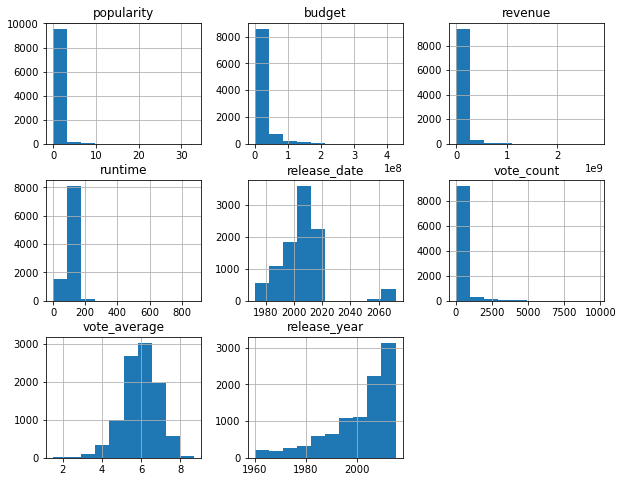

In [18]:
# Observing distribution of numerical columns
new_df.hist(figsize=(10,8));

> We can see that the number of movies released has been increasing over the years.
> Also, The vote average follows almost a normal distribution with most movies getting an averate vote between 5.5 to 5.6

### Useful Functions

In [19]:
# Since the some columns have multiple values separated by '|', we are using the function below to put them on separate rows.
# The result is a new column with these values on separate rows. The function retuns a new copy of the dataframe with 
# this additional column
def separateCategories(df_, colname, new_colname):
    df_new = new_df.join(df_[colname].str.strip('|').str.split('|',expand=True) \
            .stack().reset_index(level=1,drop=True).rename(new_colname)) \
           .reset_index(drop=True)
    return df_new
    

### Research Question 1: Which genres are most popular from year to year?

In [20]:
# separating genre column so each genre is on it own row
df_separate_genre = separateCategories(new_df, "genres", "genre")
df_separate_genre.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month_name,genre
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Action
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Adventure
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Science Fiction
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Thriller
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,May,Action


[Text(0.5, 0, 'Number of movies released'), Text(0, 0.5, 'Genre')]

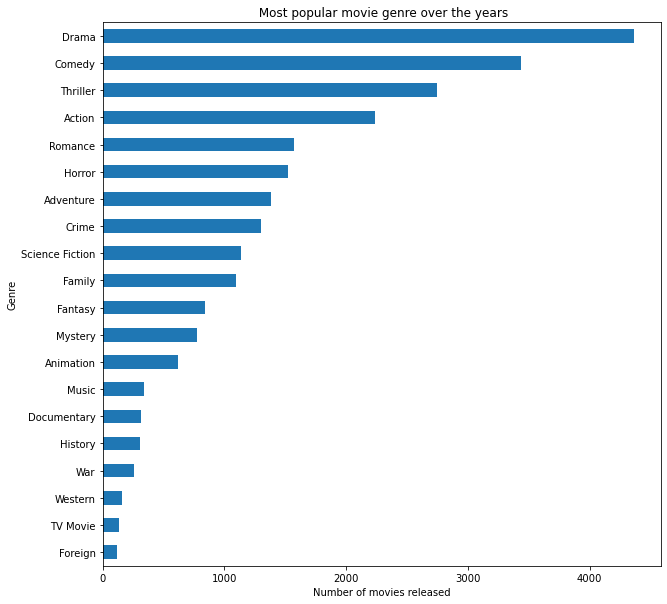

In [21]:
result = df_separate_genre.groupby(['release_year','genre']).genre.value_counts()
res =result.groupby('genre').sum().sort_values(ascending=True)
ax = res.plot(kind='barh', figsize=(10,10), title= " Most popular movie genre over the years")
ax.set(xlabel='Number of movies released', ylabel='Genre')

> The top 5 genres over the years are Drama, Comedy, Thriller, Action,and Romance.

### Which genres have the highest vote counts over the years?

[Text(0.5, 0, 'Vote Counts'), Text(0, 0.5, 'Number of movies release')]

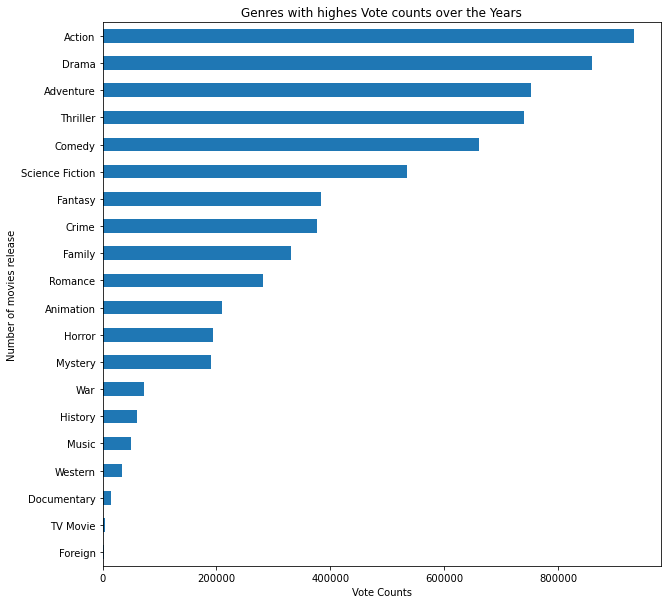

In [22]:
genre_vote = df_separate_genre.groupby('genre').vote_count.sum()
ax = genre_vote.sort_values(ascending=True).plot(kind='barh', figsize=(10,10), title= ("Genres with highes Vote counts over the Years"))
ax.set(xlabel='Vote Counts', ylabel='Number of movies release')

> Genres with the higheset vote counts over the years are Action, Drama, Adventure, Thriller, Comedy, Science fiction, Fantasy, etc

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

In [23]:
# Getting the mean revenue
mean_rev_movies = new_df['revenue'].mean()
print("The mean revenue for a movie is {}".format(mean_rev_movies))

The mean revenue for a movie is 44231208.89357348


In [24]:
# Slecting high revenue movines as movies with revenue strictly greater than the mean revenue
df_high_org = new_df[new_df['revenue'] > mean_rev_movies ]
df_high_org.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month_name
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,May
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,March
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,December
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,April


In [25]:
# Checking the size of high revenue movies
df_high_org.shape

(2041, 14)

#### There are 2041 movies that fall under high revenue movies in the dataset

### Exploring Properties of High Revenue movies

In [26]:
# Summary statistics of high revenue movies 
df_high_org.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,2041.000000,2.041000e+03,2.041000e+03,2041.000000,2041.000000,2041.000000,2041.000000
mean,1.671759,5.407046e+07,1.927170e+08,112.949535,848.561489,6.289564,2002.097501
std,1.822736,4.920753e+07,2.090377e+08,24.203506,1081.542994,0.737958,10.483311
min,0.010335,0.000000e+00,4.433202e+07,44.000000,10.000000,3.400000,1960.000000
25%,0.760503,2.000000e+07,7.217958e+07,98.000000,205.000000,5.800000,1997.000000
50%,1.200825,4.000000e+07,1.195000e+08,110.000000,445.000000,6.300000,2004.000000
75%,1.928258,7.500000e+07,2.227242e+08,124.000000,1012.000000,6.800000,2010.000000
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000


> High revenume movies have 
* a minimum vote average of 3.4, maximum vote avrage of 8.3, and mean vote average of 6.2

In [27]:
# getting summary statistics for str, and datetime datattype columns
df_high_org.describe(include=['object', 'datetime64[ns]'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3474957704.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_high_org.describe(include=['object', 'datetime64[ns]'])


,original_title,cast,director,genres,production_companies,release_date,month_name
count,2041,2041,2041,2041,2041,2041,2041
unique,2019,2021,882,716,1588,1743,12
top,Halloween,William Shatner|Leonard Nimoy|DeForest Kelley|...,Steven Spielberg,Comedy,Paramount Pictures,2014-04-16 00:00:00,December
freq,2,5,25,139,53,4,278
first,NaN,NaN,NaN,NaN,NaN,1972-03-15 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2071-12-13 00:00:00,NaN


> For high revenue movies 
* The top director for high revenue movies is Steven Spielberg. According to Wikiepeida he is an American film director, producer, and screenwriter. A figure of the New Hollywood era, he is the most commercially successful director of all time.
* The top genre in high revenue Movies is Comedy.
* The top production company is Paramount Pictures
* Most high revenue movies here released in the month of December
* 2013 recorded the highest number of release of these high revenue movies

In [28]:
# separating genre column so each genre is on it own row for the high revenue dataset 
df_high = separateCategories(df_high_org, "genres", "genre")
df_high.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month_name,genre
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Action
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Adventure
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Science Fiction
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Thriller
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,May,Action


[Text(0.5, 0, 'Genre'), Text(0, 0.5, 'Number of movies released')]

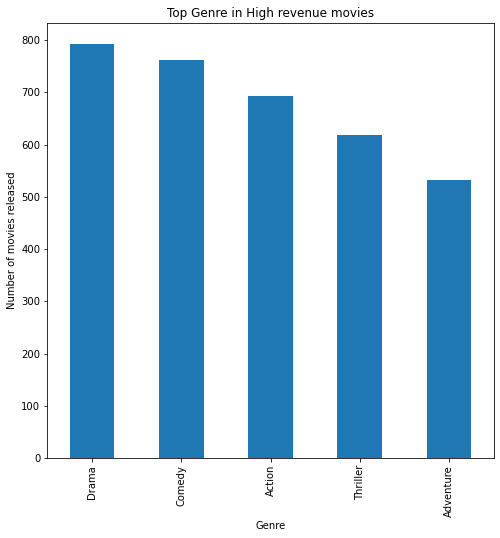

In [29]:
# Geting the top 5 genre in high revenue movies
top_5_genres = df_high.genre.value_counts().sort_values(ascending=False).head()
ax = top_5_genres.plot(kind='bar', figsize=(8,8), title='Top Genre in High revenue movies')
ax.set(xlabel='Genre', ylabel='Number of movies released')

#### The top 5 genres in the high revenue movies are Drama, Comedy,  Thiller,  Action, Adventure.   This is almost same as results from the [site](https://www.the-numbers.com/market/genres).

In [30]:
# separating cast column so each cast is on it own row
df_high = separateCategories(df_high_org, "cast", "cast_new")
df_high.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month_name,cast_new
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Chris Pratt
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Bryce Dallas Howard
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Irrfan Khan
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Vincent D'Onofrio
4,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Nick Robinson


[Text(0.5, 0, 'Cast'), Text(0, 0.5, 'Number of movies')]

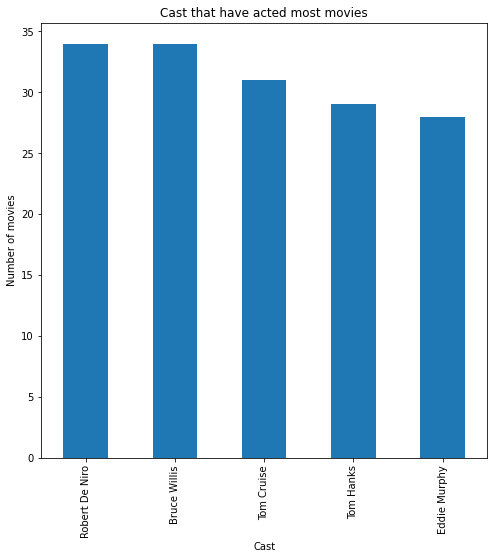

In [31]:
# Geting the top 5 cast that feature in these high revenue movies
top_5_cast = df_high.cast_new.value_counts().sort_values(ascending=False).head()
ax = top_5_cast.plot(kind='bar', figsize=(8,8), title = 'Cast that have acted most movies')
ax.set(xlabel='Cast', ylabel='Number of movies')

#### The top 5 cast that feature in the high revenue movies are  Bruce Willis, Robert De Niro, and Tom Hanks, Brad Pitt.  Good casts can have an impact on the sales, as well as make the process smooth hence these casts should be considered by production companies

[Text(0.5, 0, 'Movie Revenue'), Text(0, 0.5, 'Movie Title')]

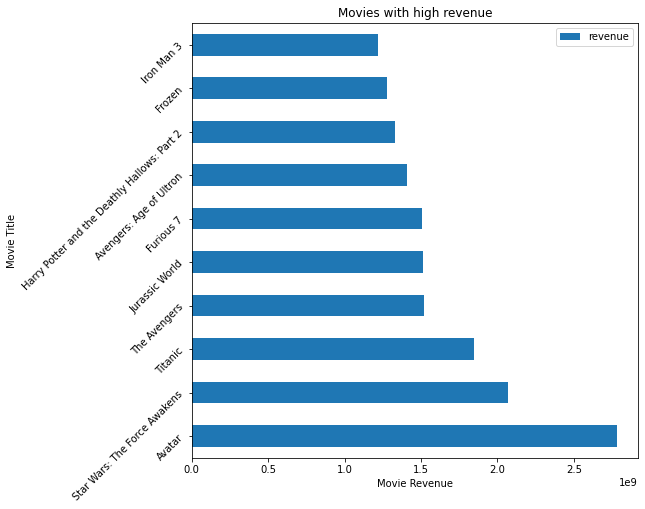

In [32]:
# The top 10 movies that has had high revenue over the years
ax = df_high_org.sort_values('revenue', ascending=False).head(10).plot.barh(x='original_title', y='revenue', rot=45, figsize=(8,8), title='Movies with high revenue' )
ax.set(xlabel='Movie Revenue', ylabel='Movie Title')

> The above reveals to us the top 10 movies in the high revenue categories. On the top of our list is Avatar, Star Wars: The fors Awaken, Titanic, The avengers and so on. This movies here are similart to that listes on the wikipedia [List of highest-grossing films](https://en.wikipedia.org/wiki/List_of_highest-grossing_films)

[Text(0.5, 0, 'Movie Budget'), Text(0, 0.5, 'Movie Title')]

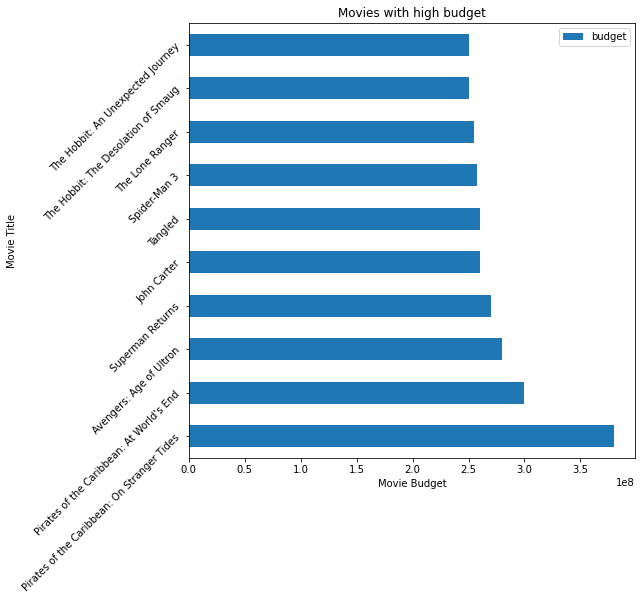

In [33]:
# The top 10 movies that has had high budget over the years
ax = df_high_org.sort_values('budget', ascending=False).head(10).plot.barh(x='original_title', y='budget', rot=45, figsize=(8,8), title='Movies with high budget'  )
ax.set(xlabel='Movie Budget', ylabel='Movie Title')

> From above we can see that Pirates of the Carribean had the highest budget. Comparing this list with the top movies with high revenues, a movie made with high budget does not guarantee that it will make more revenue.

In [34]:
# separating Production comapanies column so each cast is on it own row
companies_df = separateCategories(df_high_org, "production_companies", "company")
companies_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month_name,company
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Universal Studios
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Amblin Entertainment
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Legendary Pictures
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Fuji Television Network
4,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,Dentsu


### What are the top 10 companies with high revenue movies?

[Text(0.5, 0, 'Production Company'), Text(0, 0.5, 'Number of movies released')]

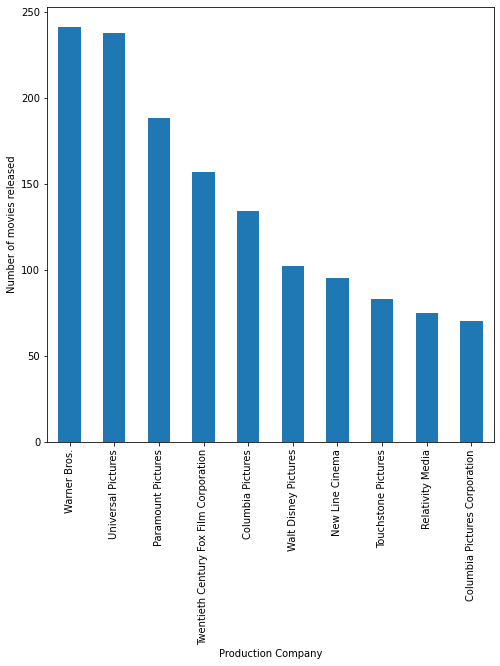

In [35]:
# Getting top 10 companies that release high revenue movies
top_10_com = companies_df.company.value_counts().sort_values(ascending=False).head(10)
ax = top_10_com.plot(kind='bar', figsize=(8,8))
ax.set(xlabel='Production Company', ylabel='Number of movies released')

#### The top 10 Companies that release high revenue movies are Warner Bros, Universal Pictures, Paramount Pictures, Twentieth century Fox Film Coorporation, Columbia pictures, Walt Disney Pictures, Touchstone Pictures, Reality Media, and columbia pictures coorporation. 
 * [Wikipedia](https://en.wikipedia.org/wiki/Major_film_studios) list some of these companies as top as well

### Research Question 3 : Which directors are more popular?

[Text(0.5, 0, 'Director'), Text(0, 0.5, 'Number of movies directed')]

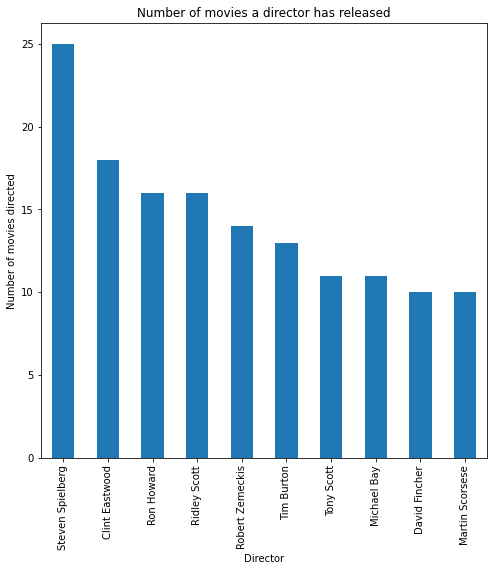

In [36]:
# Getting the top 10 Movie Directors
top_10_genres = df_high_org.director.value_counts().sort_values(ascending=False).head(10)
ax = top_10_genres.plot(kind='bar', figsize=(8,8), title='Number of movies a director has released')
ax.set(xlabel='Director', ylabel='Number of movies directed')

### The top 10 movie directors for the high revenue movies are Steven Spielberg, Clint Eastwood, Ridley Scott, Ron Howard, Robert Zemeckis, Tim Bruton, Tony Scott, Ivan Reitman, David Finder.
* [Wikepeidia](https://en.wikipedia.org/wiki/List_of_highest-grossing_film_directors) has some but not all of these on the List of highest-grossing film directors 


<AxesSubplot:ylabel='month_name'>

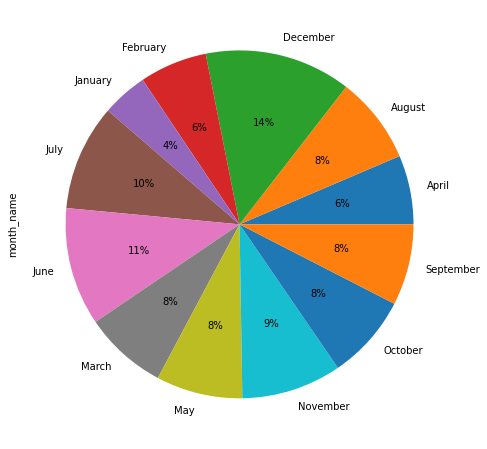

In [37]:
#Getting the month when the highest revenue movies were released
df_high_org.groupby('month_name').month_name.count().plot(kind='pie',autopct='%1.0f%%', figsize=(8,8) )

> December is the month when most of the high revenue movies were released. 

### Research Question 4 : Which month over the years were most movies released?

<AxesSubplot:ylabel='month_name'>

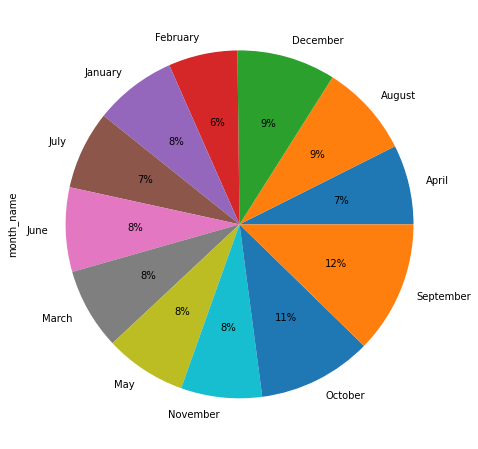

In [38]:
# Getting month with highest releases
new_df.groupby('month_name').month_name.count().plot(kind='pie',autopct='%1.0f%%', figsize=(8,8) )

[Text(0.5, 0, 'Month of the year'), Text(0, 0.5, 'Number of movies released')]

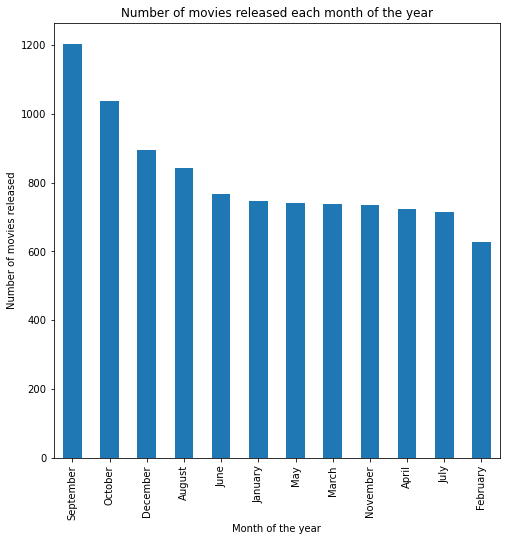

In [39]:
ax = new_df.groupby('month_name').month_name.count().sort_values(ascending=False).plot(kind='bar', figsize=(8,8), title='Number of movies released each month of the year' )
ax.set(xlabel='Month of the year', ylabel='Number of movies released')

#### The month of September recorded the highest number of releases over the years.

### Research Question 5 :Which year recorded the highest number of movies released?

[Text(0.5, 0, 'Number of movies released'), Text(0, 0.5, 'Release Year')]

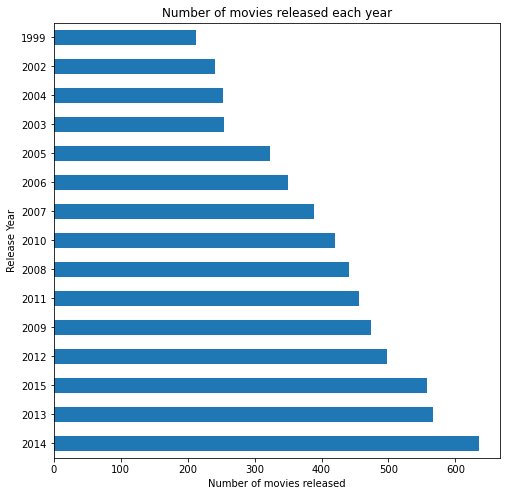

In [40]:
# Getting year with the highest number of movie releases
ax = new_df['release_year'].value_counts().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8,8), title='Number of movies released each year')
ax.set(xlabel='Number of movies released', ylabel='Release Year')

#### They year 2014 recorded the highest number of movie releases

### Research Question 6 : What type of relationship exist between vote count and revenue of a movie?

Text(0, 0.5, 'Revenue')

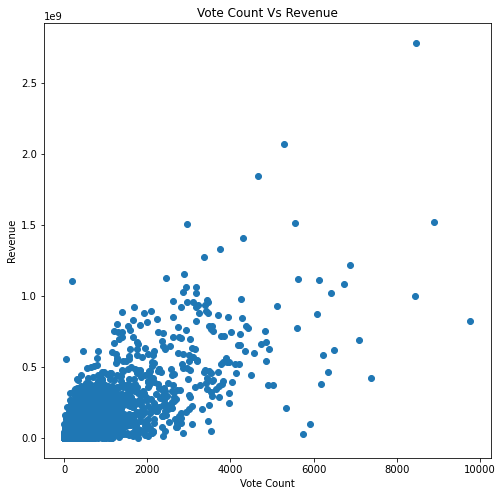

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(8,8))
plt.scatter(x=new_df['vote_count'], y=new_df['revenue'])
plt.title("Vote Count Vs Revenue")
plt.xlabel("Vote Count")
plt.ylabel("Revenue")

From the above visualization, we can see positive relationaship is positive.

### Research Question 7 : What has been the trend in revenue from movies over the years.

In [42]:
# Setting date column as index so that we can plot a trend graph.
new_df.set_index('release_date', inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9772 entries, 2015-06-09 to 2066-11-15
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   vote_count            9772 non-null   int64  
 10  vote_average          9772 non-null   float64
 11  release_year          9772 non-null   int64  
 12  month_name            9772 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


[Text(0.5, 0, 'Release Year'), Text(0, 0.5, 'Mean Revenue')]

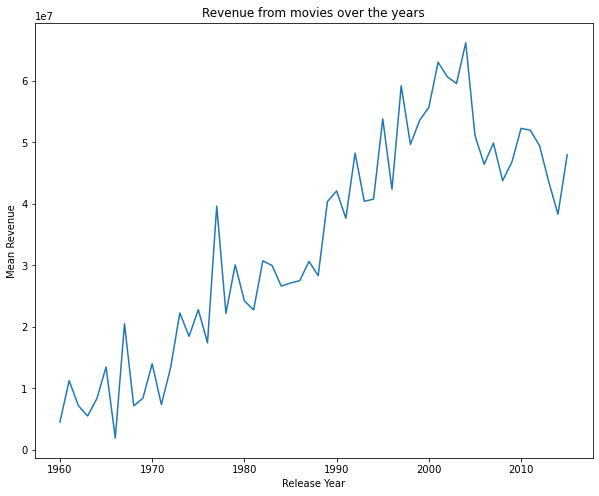

In [43]:
# Ploting the mean revenue from movies over the years
ax = new_df.groupby(['release_year']).revenue.mean().plot(figsize=(10,8), title='Revenue from movies over the years')
ax.set(xlabel='Release Year', ylabel='Mean Revenue')

> From above, we notice that the mean revenue has not been very stable. 
> Peaks can be noticed towards 1967, 1978, and around 2004

<a id='conclusions'></a>
## Conclusions
* The top 5 genres over the years are Drama, Comedy, Thriller, Action,and Romance.
*  Genres with the higheset vote counts over the years are Action, Drama, Adventure, Thriller, Comedy, Science fiction, Fantasy, etc
 * a minimum vote average of 3.4, maximum vote avrage of 8.3, and mean vote average of 6.2
 * The top director for high revenue movies is Steven Spielberg. According to Wikiepeida he is an American film director, producer, and screenwriter. A figure of the New Hollywood era, he is the most commercially successful director of all time.
 * The top genre in high revenue Movies is Comedy.
 * The top production company is Paramount Pictures
 * Most high revenue movies here released in the month of December
 * 2013 recorded the highest number of release of these high revenue movies
 * The top 5 genres in the high revenue movies are Drama, Comedy,  Thiller,  Action, Adventure.
 * The top 5 cast that feature in the high revenue movies are  Bruce Willis, Robert De Niro, and Tom Hanks, Brad Pitt.
 * On the top of our list is Avatar, Star Wars: The fors Awaken, Titanic, The avengers and so on. This movies here are similart to that listes on the wikipedia [List of highest-grossing films](https://en.wikipedia.org/wiki/List_of_highest-grossing_films)
 *  The Pirates of the Carribean had the highest budget.
 * The top 10 Companies that release high revenue movies are Warner Bros, Universal Pictures, Paramount Pictures, Twentieth century Fox Film Coorporation, Columbia pictures, Walt Disney Pictures, Touchstone Pictures, Reality Media, and columbia pictures coorporation.
 * December is the month when most of the high revenue movies were released.  
* September is the month when most movies were released. 
* The top 10 movie directors for the high revenue movies are Steven Spielberg, Clint Eastwood, Ridley Scott, Ron Howard, Robert Zemeckis, Tim Bruton, Tony Scott, Ivan Reitman, David Finder
* They year 2014 recorded the highest number of movie releases
* There is a positive relationship between vote count and revenue.
* the mean revenue has not been very stable. Peaks can be noticed towards 1967, 1978, and around 2004. Also, it has been increasing over the years.

 
> One limitation of this analysis is that I dropped all the missing values, This could have led to loose of some reasonable portion of the data which might make the anaysis not to be very accurate

> additional research can be done can be that we could find out the top casts in eact popular genre 


In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295